In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [116]:
df = pd.read_csv('kc_house_data.csv')

In [117]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [118]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [119]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [120]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


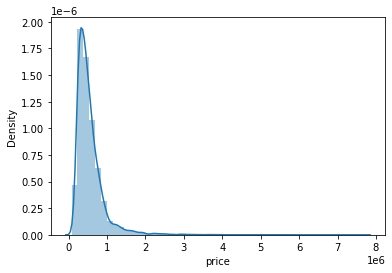

In [121]:
sns.distplot(df['price']);

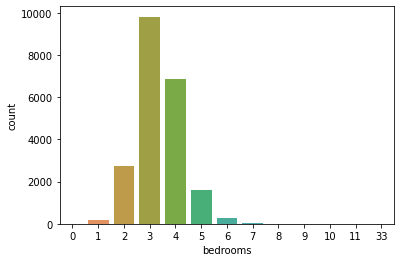

In [122]:
sns.countplot(x=df['bedrooms']);

In [123]:
df.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

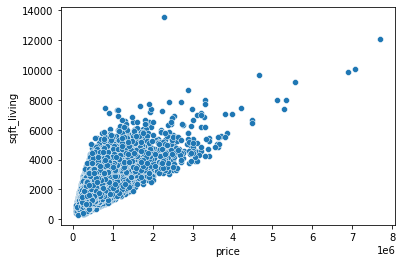

In [124]:
sns.scatterplot(x='price', y='sqft_living',data=df);

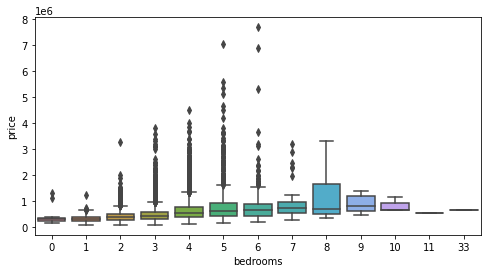

In [125]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['bedrooms'], y=df['price']);

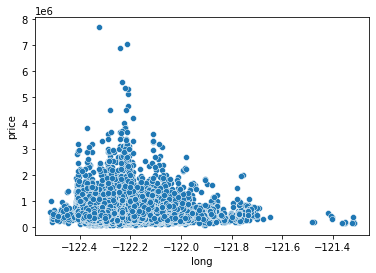

In [126]:
sns.scatterplot(x=df['long'], y=df['price']);

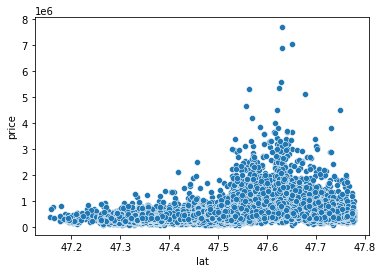

In [127]:
sns.scatterplot(x=df['lat'], y=df['price']);

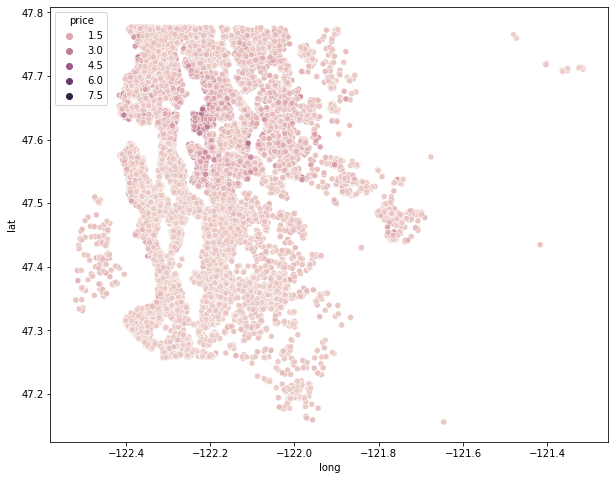

In [128]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['long'], y=df['lat'], hue=df['price']);

In [129]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570.0,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680.0,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860.0,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200.0,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720.0,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000.0,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,3,12,5990.0,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820.0,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350.0,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430.0,0,2001,0,98004,47.6208,-122.219,3720,14592


In [130]:
len(df)

21613

In [131]:
len(df)*0.01

216.13

In [132]:
non_top1percent = df.sort_values('price',ascending=False).iloc[216:]

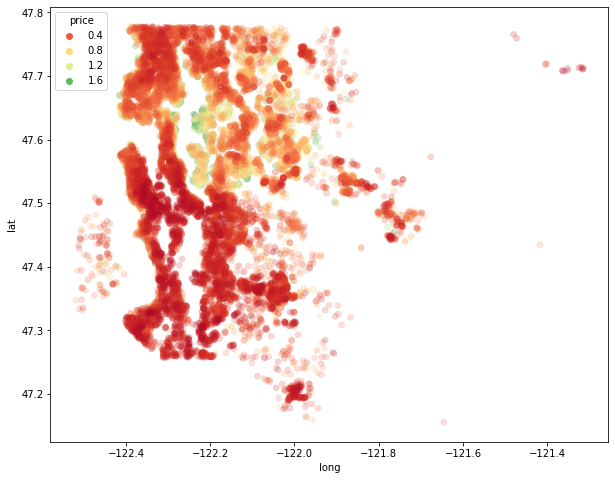

In [133]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=non_top1percent['long'], y=non_top1percent['lat'], hue=non_top1percent['price'],
                edgecolor=None, alpha=0.2, palette='RdYlGn');

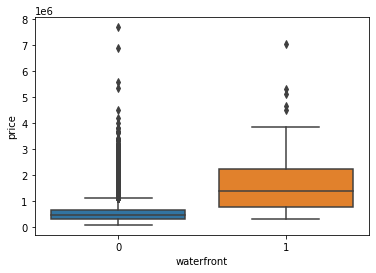

In [134]:
sns.boxplot(x='waterfront', y='price', data=df);

In [135]:
df = df.drop('id',axis=1)

In [136]:
df['date'] = pd.to_datetime(df['date'])

In [137]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [138]:
df['year'] = df['date'].apply(lambda date: date.year)

In [139]:
df['month'] = df['date'].apply(lambda date: date.month)

In [140]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


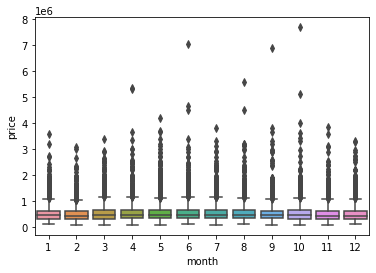

In [141]:
sns.boxplot(x='month', y='price', data=df);

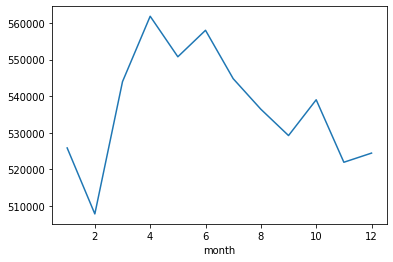

In [142]:
df.groupby('month').mean()['price'].plot();

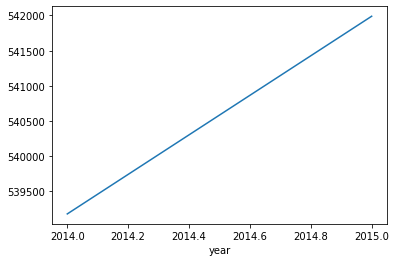

In [143]:
df.groupby('year').mean()['price'].plot();

In [144]:
df = df.drop('date',axis=1)

In [145]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [146]:
df['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [147]:
df = df.drop('zipcode',axis=1)

In [148]:
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [149]:
df = df.dropna()

In [150]:
df['sqft_basement'].value_counts()

0       13125
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [151]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [154]:
from sklearn.preprocessing import MinMaxScaler

In [155]:
scaler = MinMaxScaler()

In [156]:
X_train = scaler.fit_transform(X_train)

In [157]:
X_test = scaler.transform(X_test)

In [158]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [159]:
X_train.shape

(15127, 19)

In [160]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [161]:
X_train[0]

array([0.27272727, 0.125     , 0.10566038, 0.0043493 , 0.        ,
       0.        , 0.        , 0.75      , 0.5       , 0.15350877,
       0.        , 0.6       , 0.        , 0.3032009 , 0.17871987,
       0.20495612, 0.00808807, 0.        , 0.90909091])

In [162]:
model.fit(x=X_train, y=y_train, validation_data=(X_test,y_test), batch_size=128, epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 3ms/step - loss: 423479188138.6667 - val_loss: 425386639360.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 423967667268.2667 - val_loss: 420213129216.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 417855209198.9333 - val_loss: 375556767744.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 362628207957.3333 - val_loss: 236800999424.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 191104846916.2667 - val_loss: 110391476224.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 105319488921.6000 - val_loss: 97845288960.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 99100505770.6667 - val_loss: 96312664064.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 94226313489.0667 - val_loss: 94138376192.0000
Epoch 9/400
119/119 [

In [163]:
loss_df = pd.DataFrame(model.history.history)

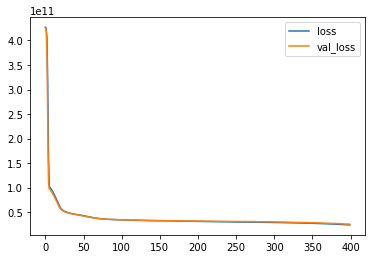

In [164]:
loss_df.plot()

In [165]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [166]:
predictions = model.predict(X_test)

In [167]:
mean_squared_error(y_test, predictions)

25554619091.468372

In [168]:
mean_absolute_error(y_test, predictions)

91792.84572842767

In [169]:
df['price'].describe()['mean']

540085.0265142751

In [170]:
explained_variance_score(y_test, predictions)

0.807804303770898

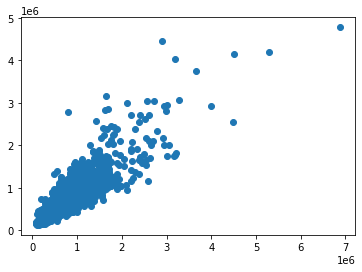

In [171]:
plt.scatter(y_test, predictions);